In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

In [18]:
#Dividing the data into train and test(80-20)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

In [19]:
# output accuracy score
# Performing a KNN Algorithm when k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# When k=5 the accuracy is 1.00 or 100%

Accuracy: 1.0


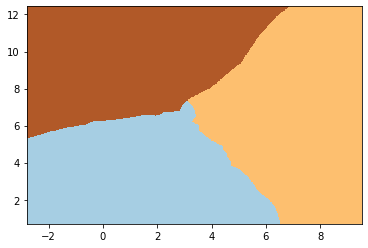

In [16]:
# plot your different results
h = 0.02  # step size in the mesh

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

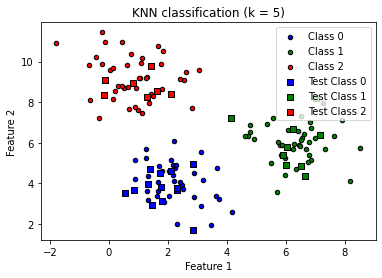

In [15]:
# plot the training points
for i, color in zip(range(n_classes), "bgr"):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, label="Class %d" % i,
                cmap=plt.cm.Paired, edgecolor="black", s=20)
    # plot the testing points
for i, color in zip(range(n_classes), "bgr"):
    idx = np.where(y_test == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, marker="s", label="Test Class %d" % i,
                cmap=plt.cm.Paired, edgecolor="black", s=40)
    plt.title("KNN classification (k = %i)" % knn.n_neighbors)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
    